In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPool2D, Conv2D, Dropout, Flatten, Rescaling, Dense, Input, BatchNormalization, ReLU
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import Precision, Recall, F1Score

In [4]:
from tensorflow.python.client import device_lib

tf.test.is_built_with_cuda()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6107140837197711398
xla_global_id: -1
]


False

In [2]:
import kagglehub

path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

C:\Users\gaura\Desktop\GitRepo\MachineLearning\CNN\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\gaura\.cache\kagglehub\datasets\paultimothymooney\chest-xray-pneumonia\versions\2


In [2]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

dataset = image_dataset_from_directory("./chest_xray_data/train", color_mode="grayscale")
cv_dataset = image_dataset_from_directory("./chest_xray_data/val", color_mode="grayscale")
test_dataset = image_dataset_from_directory("./chest_xray_data/test", color_mode="grayscale")

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [9]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1)
])

In [27]:
model = Sequential([
    Input((256, 256, 1), batch_size=32),
    data_augmentation,
    Rescaling(1/255),

    Conv2D(32, (3, 3), padding="same", use_bias=True),
    # BatchNormalization(),
    ReLU(),
    MaxPool2D(),

    Conv2D(64, (3, 3), padding="same", use_bias=True),
    # BatchNormalization(),
    ReLU(),
    MaxPool2D(),
    # Dropout(0.3),

    Conv2D(128, (3, 3), padding="same", use_bias=True),
    # BatchNormalization(),
    ReLU(),
    MaxPool2D(),
    # Dropout(0.3),

    Flatten(),
    # Dropout(0.5),
    Dense(128, "relu", kernel_regularizer=l2(1e-4)),
    Dense(1, "sigmoid", kernel_regularizer=l2(1e-4))
])

model.compile("adam", "binary_crossentropy", metrics=["accuracy", "AUC", 'precision', 'recall', ])

In [119]:
history = model.fit(dataset, validation_data=cv_dataset)

163/163 ━━━━━━━━━━━━━━━━━━━━ 103s 632ms/step - AUC: 0.9510 - accuracy: 0.9036 - loss: 0.2646 - precision: 0.9250 - recall: 0.9471 - val_AUC: 0.7812 - val_accuracy: 0.6250 - val_loss: 0.6673 - val_precision: 0.6000 - val_recall: 0.7500


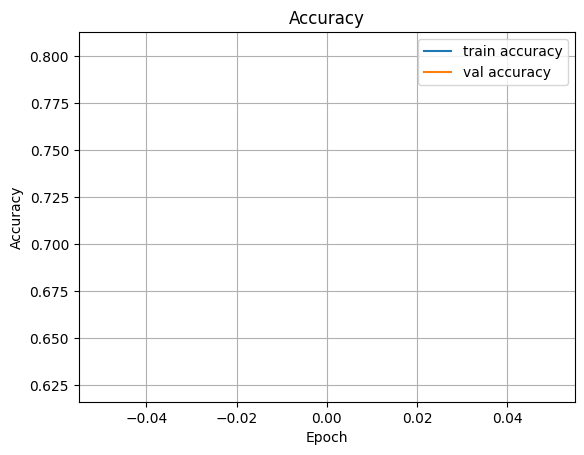

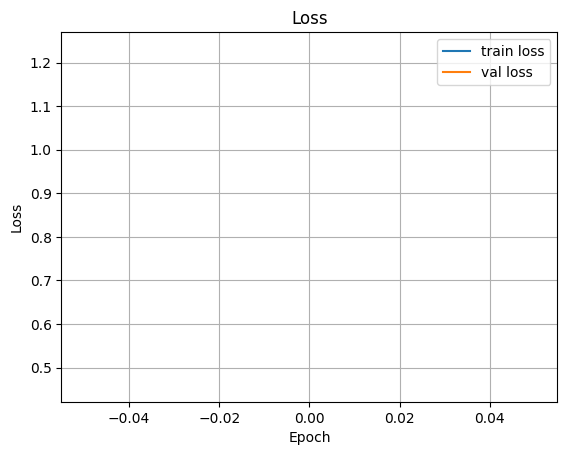

In [43]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [151]:
model.evaluate(test_dataset)

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - AUC: 0.9358 - accuracy: 0.8692 - loss: 0.3573 - precision: 0.8755 - recall: 0.9234


[0.33883175253868103,
 0.875,
 0.9424555897712708,
 0.8842364549636841,
 0.9205127954483032]